# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 5 (Thu)**


### Student Information 

_Full Name (Last Name, First Name)_: \Salazar, Sameuel Rock
_Student No._:\2018-05248
_Section_:WFU-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SAMEUEL ROCK CENA SALAZAR


### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/20
* Problem 2 - []/30
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


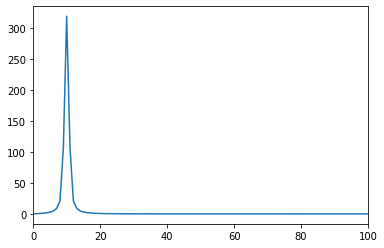

In [ ]:
import numpy as np
# Let's define the given function y_n
def y(n):
  return np.sin(np.pi*n/N)*np.sin(20*np.pi*n/N) 

# Let's make an array from y_n function
N = 1000
n = np.arange(0.0, N) # makes the domain n with N evenly spaced samples
y = y(n)
#print(y) # test if it works

# User defined DFT from Newman
def dft(y): # this function only depends on y
  N = len(y) 
  c = np.zeros(N//2+1, complex) # generates and array of zeros with N//2 + 1 complex elements
  for k in range(N//2+1):
    for n in range(N):
      c[k] += y[n]*np.exp(-2j*np.pi*k*n/N) # direct translation from eq 7.20 of Newman
  return c
# this dft(y) gives the fourier coefficients
#print(dft(y)) # test if it works


# Plotting the magnitudes of c_k
from pylab import plot, xlim, show
c = dft(y)
plot(abs(c))
xlim(0, 100)
show()

# this graph shows a single spike which is its frequency, no harmonics detected since it's a product of odd functions

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

 blur.txt	    dow.txt	      'ROTC FILES'  'Twice pics'
'Colab Notebooks'  'Python Notebook'   Trash	    'Yes or Yes (2 stars)'


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
``` 

In [ ]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

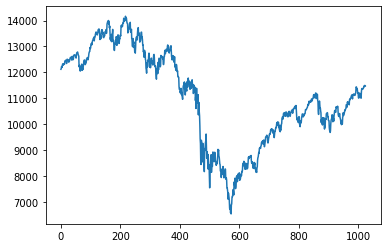

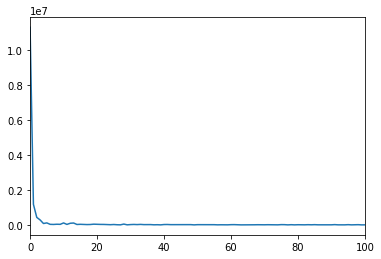

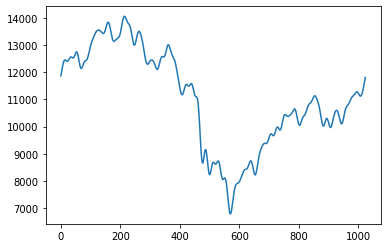

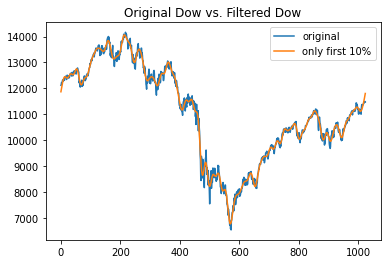

In [ ]:
# Plotting the dow.txt on a graph

plot(dow)
show()

# Calculating the fourier coefficients of the dow

c = np.fft.rfft(dow) # forward fourier transform of the dow array

# print(c) #checking if it works

# Checking the magnitudes of the fourier coefficients
plot(abs(c))
xlim(0, 100)
show()
# Here it shows a single spike at the first values that overshadows succeeding fluctuations


# Setting all but the first 10% of the rfft to zero
# Modifying the last 90% items of the rfft array
c[int(0.10*len(c)):] = 0 # this sets all the elements after the 10th percent element to zero
#print(c) # checking if it works

# Graphing the new array of the dow, with only the first 10%
y = np.fft.irfft(c)
plot(y)
show()
# With only the first 10% Fourier coefficients of the dow, it kept enough information to show the 'smoothened out' fluctuations
# This means that the first Fourier coefficients contains the most information, suitable for filtering noisy data and compressing large files

# Graphing them side by side, the original in yellow, and the first 10% in blue
from pylab import legend, title
plot(dow, label = "original")
plot(y, label = "only first 10%")
legend(loc = "upper right")
title("Original Dow vs. Filtered Dow")
show()

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

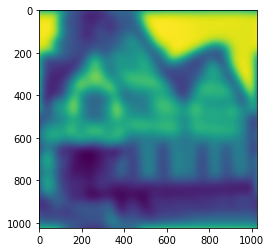

In [ ]:
blur = np.loadtxt(file_path+"blur.txt")

# Density plot of this blurred photo
from pylab import imshow
imshow(blur)
show()


[[1.00000000e+000 1.91855567e-136 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.91855567e-136 3.68085585e-272 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]
2


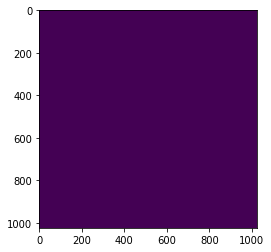

In [ ]:
# Defining the Gaussian point spread function
import numpy as np
import matplotlib.pyplot as plt 
def f(x,y):
  sigma = 25
  return np.exp(-(x**2 + y**2)/2*sigma**2)

# Creating an array from this PSF
N = 1024
x, y = np.mgrid[slice(N), 
                slice(N)] # generating a grid of samples with x and y
PSF = f(x, y)
print(PSF) # Checking if it works
print(PSF.ndim) # checking the dimensions of PSF array
# Genereting a density plot of this PSF

imshow(PSF)
show()


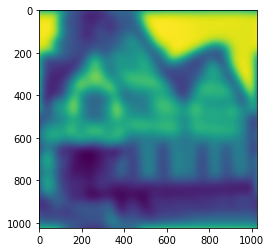

In [ ]:
# Fourier transformation

# FFT of blurred image
fftblur = np.fft.rfft2(blur)

# FFT of the PSF
fftpsf = np.fft.rfft2(PSF)

# Dividing one by the other 
unblur = fftblur/fftpsf

# Performing the Inverse FFT to get the unblurred image
restore = np.fft.irfft2(unblur)

# Graphing the restored image
imshow(restore)
show()